In [6]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def read_our(filename):
    with open(filename) as file:
        time, pressure, flow = [], [], []
        for line in file:
            row = json.loads(line)
            time.append(row["t"] / 1000.0)
            pressure.append(0.0126 * row["P"] - 12.73)
            flow.append(0.7198 * row["F"]**(4/7))
        return np.array(time), np.array(pressure), np.array(flow)

In [8]:
time, pressure, flow = read_our("../thermo-noise/thermo5ft1s10microF10k0000.out")

Text(0, 0.5, 'pressure (NM3 units)')

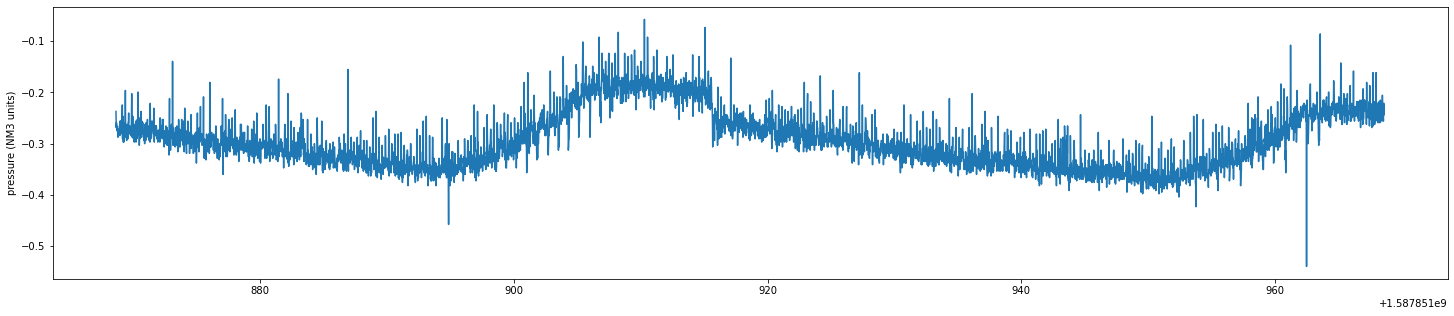

In [16]:
fig, ax1 = plt.subplots(1, 1, figsize=(25, 5))
ax1.plot(time[15000:20000], pressure[15000:20000])
ax1.set_ylabel("pressure (cm H₂O)")

In [95]:
pressure_average = 0.25*(
    pressure[4:] +
    pressure[3:-1] +
    pressure[1:-3] +
    pressure[:-4])

toreplace22 = abs(
    pressure_average -
    pressure[2:-2]) > 0.1
toreplace = np.zeros(
    len(pressure), np.bool_)
toreplace[2:-2] = toreplace22

pressure_deglitched = pressure.copy()
pressure_deglitched[toreplace] = \
    pressure_average[toreplace22]

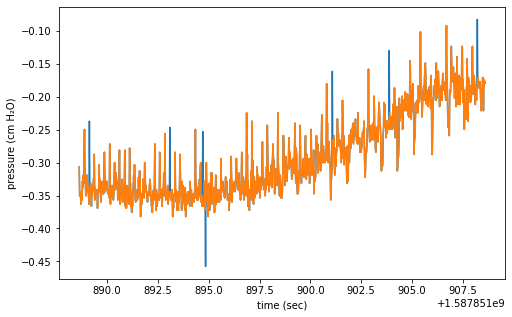

In [101]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
ax1.plot(time[16000:17000], pressure[16000:17000])
ax1.plot(time[16000:17000], pressure_deglitched[16000:17000])
ax1.set_ylabel("pressure (cm H₂O)")
ax1.set_xlabel("time (sec)")
fig.savefig("/tmp/degliteched.png")

In [102]:
pressure_deglitched_smoothed = pressure_deglitched.copy()
pressure_deglitched_smoothed[1:-1] = (
    0.4*pressure_deglitched_smoothed[2:] +
    0.2*pressure_deglitched_smoothed[1:-1] +
    0.4*pressure_deglitched_smoothed[:-2])

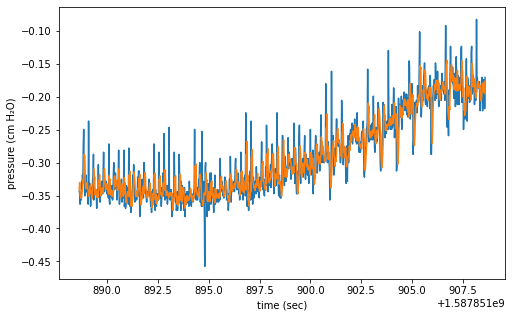

In [103]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
ax1.plot(time[16000:17000], pressure[2 + 16000: 2 + 17000])
ax1.plot(time[16000:17000], pressure_deglitched_smoothed[16000:17000])
ax1.set_ylabel("pressure (cm H₂O)")
ax1.set_xlabel("time (sec)")
fig.savefig("/tmp/degliteched_smoothed.png")